In [ ]:

# x^3

def calculate(x):
    return (x*x*x)

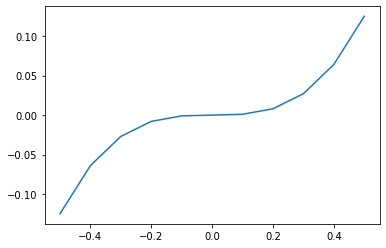

In [ ]:
import matplotlib.pyplot as plt

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
outputs = [calculate(x) for x in inputs]

plt.plot(inputs,outputs)
plt.show()

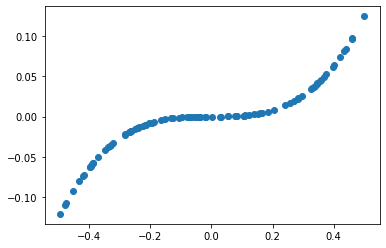

In [ ]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot
# generate randoms sample from x^2
def generate_samples(n=100):
    # generate random inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2 (quadratic)
    X2 = X1 * X1 * X1
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return hstack((X1, X2))
    
# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose,LeakyReLU, BatchNormalization,Dense
from tensorflow.keras.utils import plot_model

In [ ]:
def get_discriminator(n_inputs):
    model = Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_shape=(n_inputs,)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
model = get_discriminator(2)

model.summary()

plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True

SyntaxError: ignored

In [ ]:
# generating n real samples with class labels
import numpy as np
from numpy.random import rand

def gen_real_samples(n):
    # generate samples btw [-0.5,0.5]
    X1 = rand(n) - 0.5
    # Generate output
    X2 = X1 * X1 * X1
    #Reshape
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1,X2))
    #generate class labels
    y = np.ones((n,1))
    return X,y


In [ ]:
rand(5)

array([0.72414426, 0.14229329, 0.43036581, 0.92968561, 0.11899703])

In [ ]:
# generating n fake samples with class labels
import numpy as np
from numpy.random import rand

def gen_fake_samples(n):
    # generate samples btw [-1,1]
    X1 = -1 + rand(n) * 2
    # Generate output
    X2 = -1 + rand(n) * 2
    #Reshape
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1,X2))
    #generate class labels
    y = np.zeros((n,1))
    return X,y

In [ ]:
# We will now train and evaluate our discriminator model. 
# This can be achieved by manually enumerating the training epochs and for each epoch generating a half batch of
# real examples and a half batch of fake examples, and updating the model on each, e.g. one
# whole batch of examples.

def train_discriminator_model(model,n_epochs=1000,n_batches=128):
    half_batch = int(n_batches/2)
    for i in range(n_epochs):
        #generate real samples
        X_real,y_real = gen_real_samples(half_batch)
        #update model
        model.train_on_batch(X_real,y_real)
        #generate fake samples
        X_fake,y_fake = gen_fake_samples(half_batch)
        #update model
        model.train_on_batch(X_fake,y_fake)
        
        #evaluate model
        lossreal,acc_real = model.evaluate(X_real,y_real)
        lossfake,acc_fake = model.evaluate(X_fake,y_fake)
        #print accuracies
        print(i,acc_real,acc_fake)

In [ ]:
model = get_discriminator(2)
train_discriminator_model(model)

2/2 [==============================] - 0s 5ms/step - loss: 0.9420 - accuracy: 0.1406
0 0.984375 0.140625
2/2 [==============================] - 0s 4ms/step - loss: 0.9591 - accuracy: 0.1250
1 0.96875 0.125
2/2 [==============================] - 0s 5ms/step - loss: 0.9382 - accuracy: 0.1875
2 0.984375 0.1875
2/2 [==============================] - 0s 5ms/step - loss: 0.9088 - accuracy: 0.1875
3 0.953125 0.1875
2/2 [==============================] - 0s 4ms/step - loss: 0.8815 - accuracy: 0.2812
4 0.84375 0.28125
2/2 [==============================] - 0s 5ms/step - loss: 0.8214 - accuracy: 0.3438
5 0.890625 0.34375
2/2 [==============================] - 0s 5ms/step - loss: 0.8584 - accuracy: 0.3125
6 0.84375 0.3125
2/2 [==============================] - 0s 4ms/step - loss: 0.8450 - accuracy: 0.3594
7 0.796875 0.359375
2/2 [==============================] - 0s 6ms/step - loss: 0.9126 - accuracy: 0.2188
8 0.8125 0.21875
2/2 [==============================] - 0s 6ms/step - loss: 0.8527 - accu

In [ ]:
# standalone generator model

def build_generator(latent_dim,n_outputs=2):
    model = Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

In [ ]:
from numpy.random import randn

# generate points in latent space as input to our generator
def generate_latent_points(latent_dim,n):
    # generate points in latent space
    x_input = randn(latent_dim*n)
    # reshape into batches of inputs for the network
    x_input = x_input.reshape(n,latent_dim)
    return x_input

In [ ]:
# use generator to generate new samples and plot the result
def gen_fake_samples(generator,latent_dim,n):
    #generate points in latent space
    X_input = generate_latent_points(latent_dim,n)
    X_output = generator.predict(X_input)
    y = np.zeros((n,1))
   # plt.scatter(X_output[:,0],X_output[:,1])
    #plt.show()
    return X_output,y

In [ ]:
#size of the latent dim
latent_dim = 5
# generator model
gen_model = build_generator(latent_dim)
#generate and plot 100 generated samples
gen_fake_samples(gen_model,latent_dim,100)

(array([[-1.88222027e+00,  3.15917939e-01],
        [-8.06452572e-01,  7.12713420e-01],
        [-1.95358419e+00,  1.25039721e+00],
        [-2.44487643e+00,  2.46320575e-01],
        [-2.11456347e+00, -2.32302561e-01],
        [-5.67442894e-01,  1.73624206e+00],
        [ 6.82665631e-02,  3.93029511e-01],
        [-1.04345965e+00, -4.20386493e-01],
        [-6.93765402e-01,  9.01668370e-01],
        [-8.99820566e-01, -4.90017742e-01],
        [-1.29574025e+00,  4.82133180e-01],
        [-1.90155196e+00,  3.46410900e-01],
        [-8.14146340e-01, -9.85093713e-01],
        [-1.06471741e+00, -3.79471518e-02],
        [-2.89439011e+00,  1.78344548e+00],
        [-9.07601476e-01,  3.73277992e-01],
        [-7.03245342e-01, -9.82293263e-02],
        [-1.51967084e+00,  6.33451343e-01],
        [-4.95011568e-01,  6.42331243e-01],
        [-1.34210443e+00,  1.39372706e-01],
        [-4.83083218e-01,  1.65110755e+00],
        [-5.45671463e-01,  7.14583993e-01],
        [-4.99366879e-01,  5.891

In [ ]:
# defines the combined generator and discriminator model

def define_gan(generator,discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model 

In [ ]:
# train generator and discriminator
def train(gen_mod,dis_mod,gan_mod,latent_dim,n_epochs=1000,n_batches=128,n_eval=2000):
    half_batches = int(n_batches/2)
    for i in range(n_epochs):
        X_real,y_real = gen_real_samples(half_batches)
        X_fake,y_fake = gen_fake_samples(gen_model,latent_dim,half_batches)

        #train the discriminator model
        dis_mod.train_on_batch(X_real,y_real)
        dis_mod.train_on_batch(X_fake,y_fake)
        
        #prepare points in latent space for input to generator model
        X_gan = generate_latent_space(latent_dim,n_batches)
        y_gan = np.ones((n_batches,1))
        
        #update the generator via discriminator error
        gan_mod.train_on_batch(X_gan,y_gan)

In [ ]:
#Evaluate the performance of generator and didcriminator
def summarize_perf(epoch,latent_dim,n,discriminator,generator):
    #generate real samples
    X_real,y_real = gen_real_samples(n)
    #evaluate discriminator on real samples
    lossreal, acc_real = discriminator.evaluate(X_real,y_real)

    #generate fake samples
    X_fake, y_fake = gen_fake_samples(generator,latent_dim,n)
    #evaluate discriminator on fake samples
    lossfake, acc_fake = discriminator.evaluate(X_fake,y_fake)
    # summarize discriminator performance
    print(epoch,acc_real,acc_fake)
    #plot real and fake data
    plt.scatter(X_real[:,0],X_real[:,1],color='red')
    plt.scatter(X_fake[:,0],X_fake[:,1],color='blue')
    plt.show()
    
    #save plot to file
    f = 'gen_%d.png' %(epoch+1)
    plt.savefig(f)
    plt.close()

In [ ]:
# train generator and discriminator
def train(gen_mod,dis_mod,gan_mod,latent_dim,n_epochs=10000,n_batches=128,n_eval=2000):
    half_batches = int(n_batches/2)
    for i in range(n_epochs):
       # print(half_batches)
        X_real,y_real = gen_real_samples(half_batches)
        print(i)
        X_fake,y_fake = gen_fake_samples(gen_model,latent_dim,half_batches)

        #train the discriminator model
        dis_mod.train_on_batch(X_real,y_real)
        dis_mod.train_on_batch(X_fake,y_fake)
        
        #prepare points in latent space for input to generator model
        X_gan = generate_latent_points(latent_dim,n_batches)
        y_gan = np.ones((n_batches,1))
        
        #update the generator via discriminator error
        gan_mod.train_on_batch(X_gan,y_gan)
        
        if(i+1) % 2000 ==0:
          summarize_perf(i,latent_dim,100,discriminator,generator)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

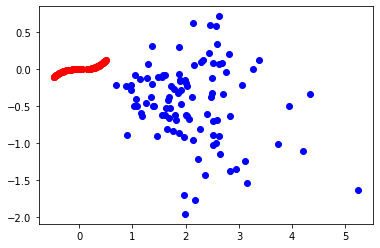

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199


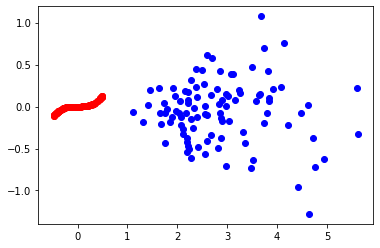

4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199


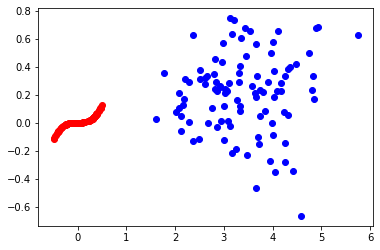

6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199


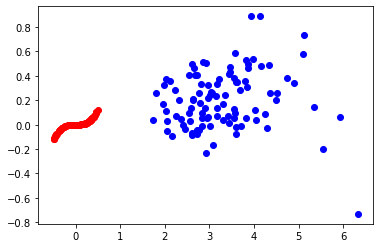

8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199


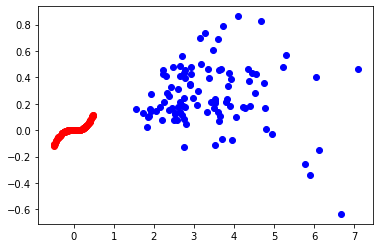

In [ ]:
# size of the latent space
latent_dim = 5
# create a discriminator
discriminator = get_discriminator(2)
#create a generator 
generator = build_generator(latent_dim)
#create the gan
gan_model = define_gan(generator,discriminator)
#train the gan model
train(generator,discriminator,gan_model,latent_dim)

In [ ]:
def getSine(x):
    return np.sin(x)

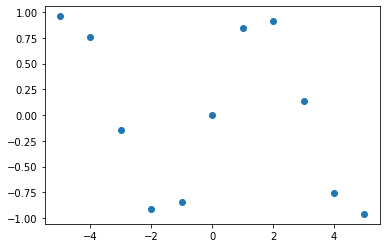

In [ ]:
inputs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
outputs = [getSine(x) for x in inputs]

plt.scatter(inputs,outputs)
plt.show()

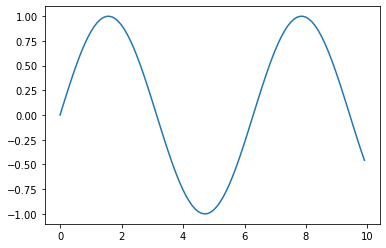

In [ ]:
time = np.arange(0, 10, 0.1)
# Amplitude of the sine wave is sine of a variable like time.
amplitude = np.sin(time)
# Plot a sine wave using time and amplitude obtained for the sine wave.
plt.plot(time, amplitude)

In [ ]:
# defining our real samples
def gen_real_samples(n):
    time = randn(n)
# Amplitude of the sine wave is sine of a variable like time.
    amplitude = np.sin(time)
    
    time = time.reshape(n,1)
    
    amplitude = amplitude.reshape(n,1)
    
    X = hstack((time,amplitude))
    y = np.ones((n,1))
    
    return X,y

In [ ]:
# defining our fake samples
def gen_fake_samples(n):
    time = randn(n)
    
    amplitude = time*2
    
    time = time.reshape(n,1)
    
    amplitude = amplitude.reshape(n,1)
    
    X = hstack((time,amplitude))
    y = np.zeros((n,1))
    
    return X,y

In [ ]:
# build discriminator model
def build_discriminator(n_inputs):
    model = Sequential()
    model.add(Dense(25,activation='relu',input_shape=(n_inputs,)))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model = build_discriminator(2)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train discriminator model 
def train_discriminator(model,n_epochs,n_batches=128):
    half_batches = int(n_batches/2)
    for i in range(n_epochs):
        X_real,y_real = gen_real_samples(half_batches)
        model.train_on_batch(X_real,y_real)
        
        X_fake,y_fake = gen_fake_samples(half_batches)
        model.train_on_batch(X_fake,y_fake)

        lossreal,acc_real = model.evaluate(X_real,y_real)

        lossfake,acc_fake = model.evaluate(X_fake,y_fake)

        print(i,acc_real,acc_fake)

In [ ]:
train_discriminator(model,300)

2/2 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.9531
0 0.234375 0.953125
2/2 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.9219
1 0.3125 0.921875
2/2 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.9062
2 0.203125 0.90625
2/2 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.9531
3 0.21875 0.953125
2/2 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.9531
4 0.3125 0.953125
2/2 [==============================] - 0s 5ms/step - loss: 0.4877 - accuracy: 0.9375
5 0.265625 0.9375
2/2 [==============================] - 0s 5ms/step - loss: 0.5093 - accuracy: 0.9219
6 0.28125 0.921875
2/2 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.9219
7 0.34375 0.921875
2/2 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.9375
8 0.421875 0.9375
2/2 [==============================] - 0s 3ms/step - loss: 0.5281 -

In [ ]:
# generator model

def build_generator(latent_dim,n=2):
    model = Sequential()
    model.add(Dense(25,activation='relu',input_dim=latent_dim))
    model.add(Dense(n,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
def generate_latent_space(latent_dim,n):
    X = randn(latent_dim*n)
    
    X = X.reshape(n,latent_dim)
    
    return X

In [ ]:
def generate_fake_samples(model,latent_dim,n):
    X_input = generate_latent_space(latent_dim,n)
    X = model.predict(X_input)
    y = np.zeros((n,1))
    
    return X,y

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_39 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_40 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_41 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_42 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 402       
Total params: 52,302
Trainable params: 52,302
Non-trainable params: 0
_________________________________________________

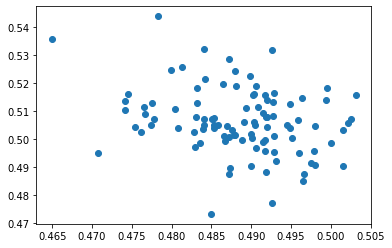

In [ ]:
latent_dim = 5
model = build_generator(latent_dim)

X,y = generate_fake_samples(model,latent_dim,100)

plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
# building our gan model 
def build_gan(generator,discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [ ]:
def summarize_perf(generator,discriminator,latent_dim,n,epoch):
    X_real,y_real = gen_real_samples(n)
    lossreal,acc_real = discriminator.evaluate(X_real,y_real)
    
    X_fake,y_fake = generate_fake_samples(generator,latent_dim,n)
    lossfake,acc_fake = discriminator.evaluate(X_fake,y_fake)
    
    print(epoch,acc_real,acc_fake)
    
    plt.scatter(X_fake[:,0],X_fake[:,1],color='red')
    plt.scatter(X_real[:,0],X_real[:,1],color='blue')
    plt.show()

In [ ]:
# training our gan model
def train_gan(gen_model,disc_model,gan_model,latent_dim,n_epochs=100000,n_batch_size=128):
    half_batch = int(n_batch_size/2)
    for i in range(n_epochs):
        X_real,y_real = gen_real_samples(half_batch)
        disc_model.train_on_batch(X_real,y_real)
        
        X_fake,y_fake = generate_fake_samples(gen_model,latent_dim,half_batch)
        disc_model.train_on_batch(X_fake,y_fake)
        
        # input for gan model
        X_gan = generate_latent_space(latent_dim,n_batch_size)
        y_gan = np.ones((n_batch_size,1))
        
        gan_model.train_on_batch(X_gan,y_gan)
        
        if(i%10000 == 0):
          summarize_perf(generator,discriminator,latent_dim,100,i)
        
        
        

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 52        
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
4/4 [=============================

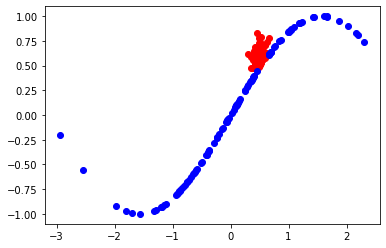

4/4 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 1.0000
10000 0.5899999737739563 1.0


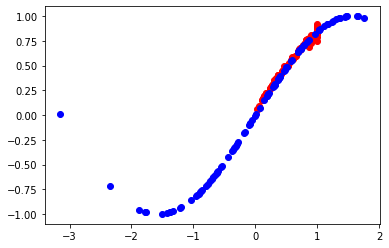

4/4 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 1.0000
20000 0.6000000238418579 1.0


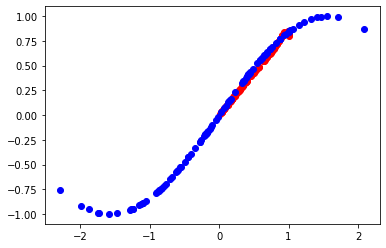

4/4 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 1.0000
30000 0.7099999785423279 1.0


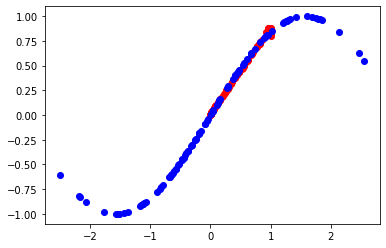

4/4 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 1.0000
40000 0.6899999976158142 1.0


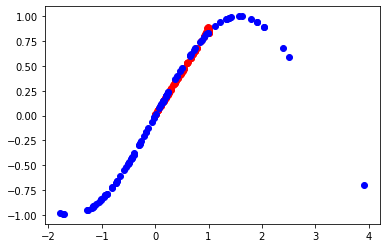

4/4 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 1.0000
50000 0.6100000143051147 1.0


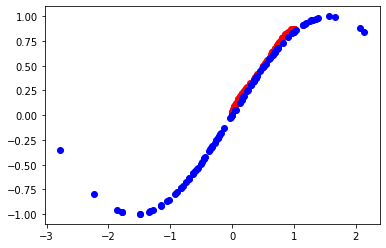

4/4 [==============================] - 0s 3ms/step - loss: 0.3007 - accuracy: 1.0000
60000 0.699999988079071 1.0


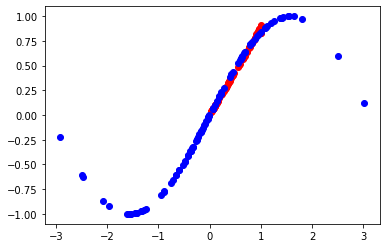

4/4 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 1.0000
70000 0.7599999904632568 1.0


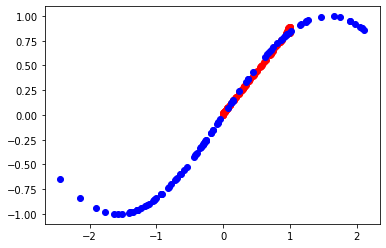

4/4 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 1.0000
80000 0.699999988079071 1.0


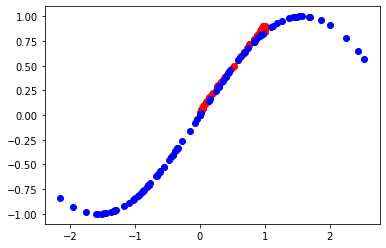

4/4 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 1.0000
90000 0.6800000071525574 1.0


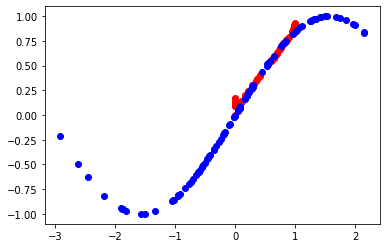

In [ ]:
# size of the latent space
latent_dim = 5
# create a discriminator
discriminator = build_discriminator(2)
#create a generator 
generator = build_generator(latent_dim)
#create the gan
gan_model = build_gan(generator,discriminator)
#train the gan model
train_gan(generator,discriminator,gan_model,latent_dim)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 52        
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
4/4 [=============================

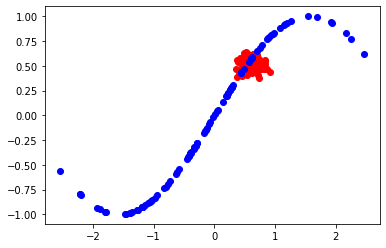

4/4 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 1.0000
10000 0.5400000214576721 1.0


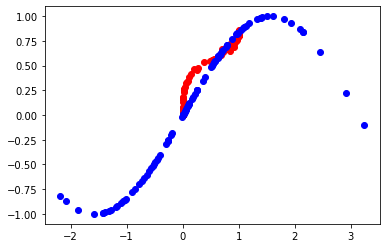

4/4 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 1.0000
20000 0.6299999952316284 1.0


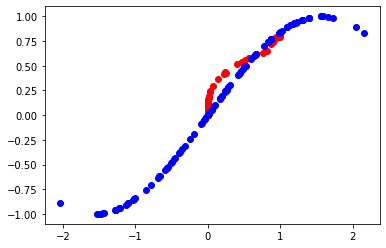

In [ ]:
# size of the latent space
latent_dim = 5
# create a discriminator
discriminator = build_discriminator(2)
#create a generator 
generator = build_generator(latent_dim)
#create the gan
gan_model = build_gan(generator,discriminator)
#train the gan model
train_gan(generator,discriminator,gan_model,latent_dim)

4/4 [==============================] - 0s 3ms/step - loss: 0.2954 - accuracy: 1.0000
0 0.6399999856948853 1.0


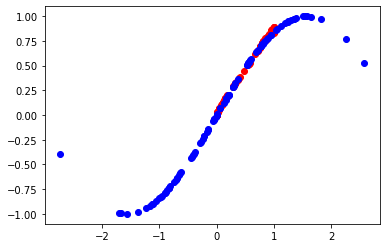

4/4 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 1.0000
10000 0.6000000238418579 1.0


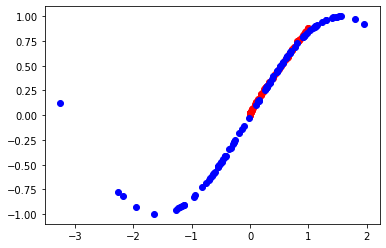

4/4 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 1.0000
20000 0.6800000071525574 1.0


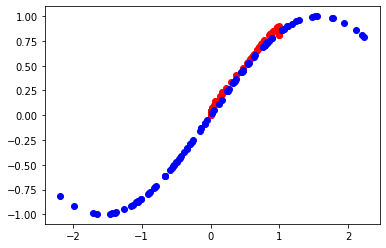

4/4 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 1.0000
30000 0.6399999856948853 1.0


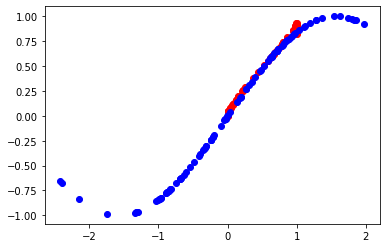

4/4 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 1.0000
40000 0.7300000190734863 1.0


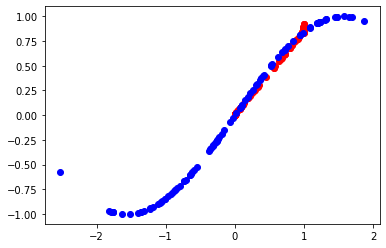

KeyboardInterrupt: ignored

In [ ]:
train_gan(generator,discriminator,gan_model,latent_dim)

In [ ]:
np.random.uniform(-1,1)

-0.40408769069315764

In [ ]:
randn(5*2)

array([ 0.23852318,  1.70634353, -0.04985516,  0.5373966 ,  0.17364362,
        1.54337622,  0.13687035, -1.55882934, -0.17690223, -0.51755542])